# 2.3习题

<hr/>
## 对知识点的判断

- 顺序存储方式只能存储线性结构
    - 也可以存储满二叉树

<hr/>


- 静态链表需要较大的连续空间，插入删除都不需要移动元素
    - 这是静态链表的定义保证的，去看关于静态链表的笔记

<hr/>


- 在一个长度为n的有序单链表中插入节点并保持有序，需要的时间复杂度是O(n)
    - 这是对的，因为有序表，你需要首先找到插入位置，这个平均花费时间O(n/2)，插入操作只需要花费O(1)


<hr/>

- 在一个长度为n的有序顺序表中插入节点并保持有序，需要的时间复杂度是O(n)
    - 顺序表可以让查找时间将为O(log2n)
    
<hr/>

- 如果用单链表表示队列，应该选用带尾指针的循环链表
    - 队列需要在表头删除，表尾插入，所以带尾指针的循环单链表比较方便
    - 这个没看懂，所以我学了队列之后再回来看吧
    
<hr/>    
- 数组排序的最小时间复杂度为O(nlog2n)
    - 对的，但我现在还不知道为什么，等到学了排序我就知道了
    
<hr/>    
- 单链表中增加一个头节点的目的是为了方便计算
    -  对
    - 第一，有了头节点，插入和删除数据的算法统一了，不再需要判断是否在第一个元素之前插入或删除第一个元素（不懂）
    - 第二，无论链表是否为空，头指针指向头节点的非空指针，链表的头指针不变，所以空表和非空表的处理也统一了(不懂)
    
<hr/>    
- 一道错题
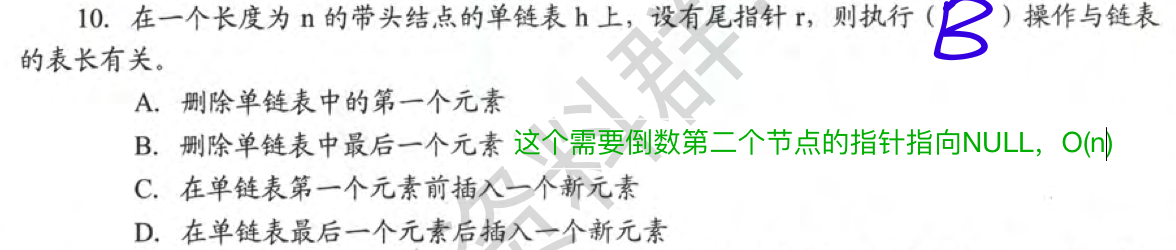


<hr/>
- 带头节点L的双循环链表为空的条件是：
    - L->prior==L&&L->next==L
    - 头节点的prior和next都指向他本身

# 应用题


- 没有头节点，意思就是从第一个节点开始就是包含元素的
- 递归的套路，第一步：就是写递归出口
- 递归的套路，第二部：写递归往下执行的条件（也是出口，这个出口是往下走）
    - 以及最后的出口
- **什么是引用？**
    - &b = a;
    - 说明ab变量就是一个变量，地址也是相同的
    - 这里的参数穿得是饮用，说明指针亲自走了L = L->next；这句话就会达到不断链的目的
 


In [ ]:
// 2.1
// 这里的&符号不是取地址，是引用的意思
void DEL_X_recursion(LinkList &L,ElemType x){
//     递归删除
    if L == NULL{
        return
    }
    if (L->data == x){
        LNode *p;//指向被删除的节点，LNode是默认的一个知道的量
        p = L;
        L = L->next;
        free(p);
        DEL_X_recursion(L,x)
    }else{
        DEL_X_recursion(L->next,x)
    }
}

In [ ]:
//2.2
//不要总想着递归呀，上一题递归可以做，这个题不要用递归
void DEL_X(LinkList &L,ElemType x){
    if(L->next == NULL){
        return;
    }
    if(L->data != x){
        DEL_X(L->next,x);
    }
    LNode *p;
    p = L;
    L = L->next;
    free(p)
    DEL_X(L,x)
}

// 不用递归的方法
void DEL_X(LinkList &L,ElemType x){
    LNode *p,*q,*pre;
    pre = L;
    p = L->next;
    while(p!=NULL){
        if(p->data == x){
            pre->next = p->next;
            //不能直接free（p），你这操作太骚了，p都被free了，还赋值个屁？
            q = p;
            free(q)
            p = pre->next;
        }else{
            p = p->next;
            pre = pre->next;
        }
    }
}
//这么做就完美了

In [ ]:
//2.3
// 这个题很明显用递归来做
void PRINT_REVERSE(LinkList &L){
    // 递归截止条件
    if(L->next == NULL){
        print(L->data);
        return;
    }else{
        // 如果不是最后一步，那么就先递归调用，再打印当前
        PRINT_REVERSE(L->next);
        print(L->data)
        return;
    }
}

In [ ]:
//2.4
//我想尝试也用递归做一下，这个题用递归不好做
void DEL_MIN(LinkList &L,min_p){
    if(L->data < min_p){
        min_p = L->data;
    }
    DEL_MIN(L->next,min_p)
}
// 这个做法失败了


// 正常的做法
// ----------返回值是不对的，要把链表返回回来
void DEL_MIN(LinkList &L){
    // 都指向初始节点
    LNode *minp=L,*minpre=L;
    // ----------链表正常工作时候，都要有一个工作节点p
    // 开始找最小值
    while(L->next != NULL){
        if(L->next->data < minp->data){
            minpre = L;
            minp = L->next;
        }
    }
    // 删除节点
    minpre->next = minp->next;
    free(minp)
}


// 改：
LinkList DEL_MIN(LinkList &L){
    // 工作节点
    LNode *pre = L,*p = pre->next;
    // 记录节点
    LNode *minp,*minpre;
    // 找最小节点
    while(p != NULL){
        if(p->data < minp->data){
            minp = p;
            minpre = pre;
        }
        pre = p;
        p = p->next;
    }
    minpre->next = minp->next;
    free(minp)
    return L;
}
//这么做就很完美

In [ ]:
//2.22
// 做大题
// 定义节点类型
typedef struct Node{
    Char data;
    struct Node *next;
}SNode;

// 定义函数查询字符串长度
// ------------函数输入用的是SNode *head，而不是什么LinkList &L,这里要考虑实用
int listlen(SNode *head){
    // 长度记录
    int len = 0
    while(head->next != NULL){
        len += 1;
        head = head->next;
    }
    return len;
}

// 算法主体
SNode* find_addr(SNode *str1,SNode *str2){
    int m,n;
    m = listlen(str1)
    n = listlen(str2)
    SNode *p,q;
    
    //同一起跑线
    for(p = str1;m>n;m--)
        p = p->next;
    for(q = str2;n>m;n--)
        q = q->next;
    
    //开始寻找
    while(p->next != NULL && p->next != q->next){
        p = p->next;
        q = q->next;
    }
    return p->next;
}

In [ ]:
// 2.23
// 定义节点结构
typedef struct Node{
    int data;
    struct Node *next;
} MNode;

// 定义绝对值
int abs(int x){
    if(x < 0){
        return -x;
    }else{
        return x;
    }
}
// 函数主体
MNode* DEL_ABS(MNode *head,m){
    q = (int *)malloc(sizeof(int) * m+1)
    int pabs;
    for(int i=0;i<m+1;i++){
        q[i] = 0
    }
    MNode *p = head->next,*pre = head,*r;
    while(p != NULL){
        pabs = abs(p->data)
        if(q[pabs] == 0){
            q[pabs] = 1;
            r = p;
            pre->next = p->next;
            p = p->next;
            free(r)
        }
    }
}

// 空间复杂度O（m），时间复杂度O（n）